In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

# <font color = 'red'> Task4.Exploratory Data Analysis (EDA). Introduction to classification.  </font>

## <font color = 'green'>1. Exploratory data analysis </font>

### <font color = 'green'> Example 1: Data loading and initial analysis. Using the example of telecom.csv </font>

In [3]:
data = pd.read_csv('telecom.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
data['Churn']=data['Churn'].astype('int64')

In [7]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
data.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [10]:
data['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [11]:
data['Churn'].value_counts(normalize = True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [12]:
abons_stat = pd.Series(data[data['Churn'] == 1].mean(numeric_only=True),name='abons')
disertirs_stat = pd.Series(data[data['Churn'] == 0].mean(numeric_only=True),name='disertirs')
ratio = pd.Series(disertirs_stat/abons_stat,name = 'ratio')

In [13]:
pd.concat([abons_stat,disertirs_stat,ratio],axis = 1).sort_values(by='ratio')

,abons,disertirs,ratio
Churn,1.000000,0.000000,0.000000
Customer service calls,2.229814,1.449825,0.650200
Total day minutes,206.914079,175.175754,0.846611
Total day charge,35.175921,29.780421,0.846614
Total eve minutes,212.410145,199.043298,0.937071
Total eve charge,18.054969,16.918909,0.937078
Total intl charge,2.889545,2.743404,0.949424
Total intl minutes,10.700000,10.158877,0.949428
Total night charge,9.235528,9.006074,0.975155
Total night minutes,205.231677,200.133193,0.975157


In [14]:
pd.crosstab(data['Churn'], data['International plan']) #для категориальных

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


In [15]:
pd.crosstab(data['Churn'], data['Voice mail plan'],normalize=True)

Voice mail plan,No,Yes
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


In [16]:
pd.crosstab(data['Churn'], data['International plan'],margins=True)

International plan,No,Yes,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [17]:
pd.crosstab(data['Churn'], data['Customer service calls'],margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


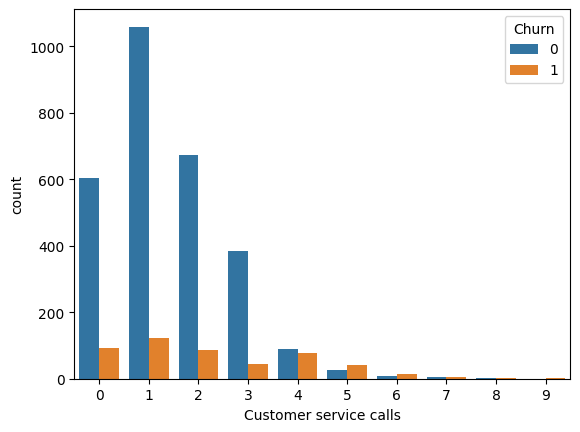

In [18]:
sns.countplot(x='Customer service calls', hue='Churn', data=data);

In [19]:
data['Intensive_service_calls_Q'] = (data['Customer service calls'] > 3).astype('int')

pd.crosstab(data['Intensive_service_calls_Q'], data['Churn'], margins=True)

Churn,0,1,All
Intensive_service_calls_Q,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


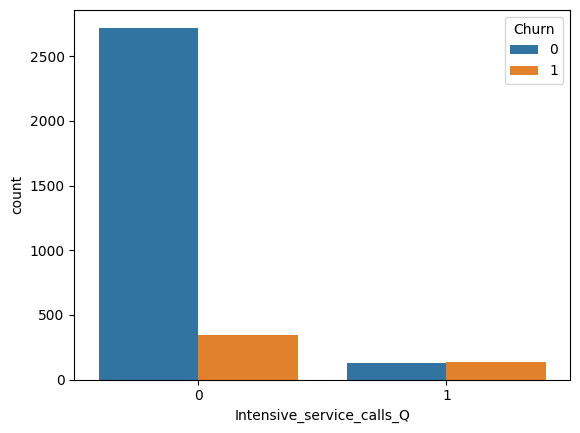

In [20]:
sns.countplot(x='Intensive_service_calls_Q', hue='Churn', data=data);

In [21]:
d = {'No' : 0, 'Yes' : 1}
data['International plan'] = data['International plan'].map(d)

In [22]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [23]:
data['Voice mail plan'] = data['Voice mail plan'].map(d)

In [24]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [25]:
pd.crosstab(data['Intensive_service_calls_Q'] & data['International plan'] , data['Churn'])

Churn,0,1
row_0,,
0,2841,464
1,9,19


### <font color = 'green'> Example 2: Correlation. Using the example of telecom.csv </font>

In [26]:
corr_matrix = data.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr() #we leave only quantitative features

In [27]:
corr_matrix

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
Account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.006321
Number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.002054
Total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,-0.005765
Total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.003287
Total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,-0.005763
Total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.001030
Total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.019002
Total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,0.001024
Total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,-0.016717
Total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141,-0.031733


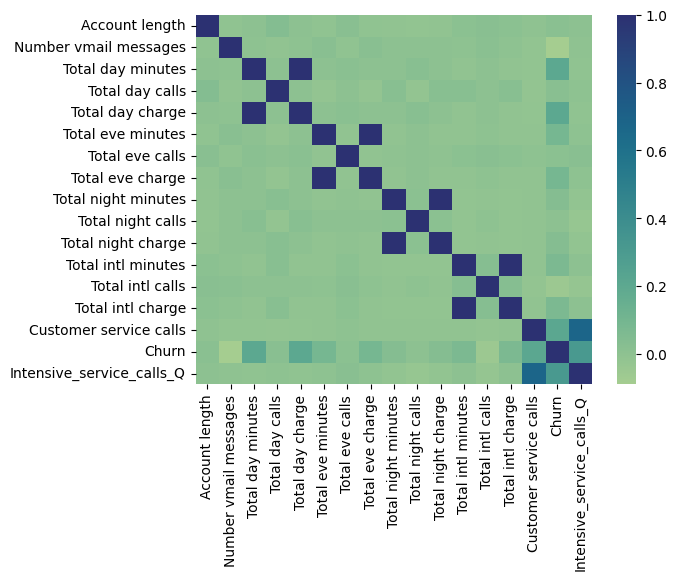

In [28]:
sns.heatmap(corr_matrix,cmap="crest");

### <font color = 'green'> Example 3. Graphical data analysis. Using telecom.csv as an example </font>

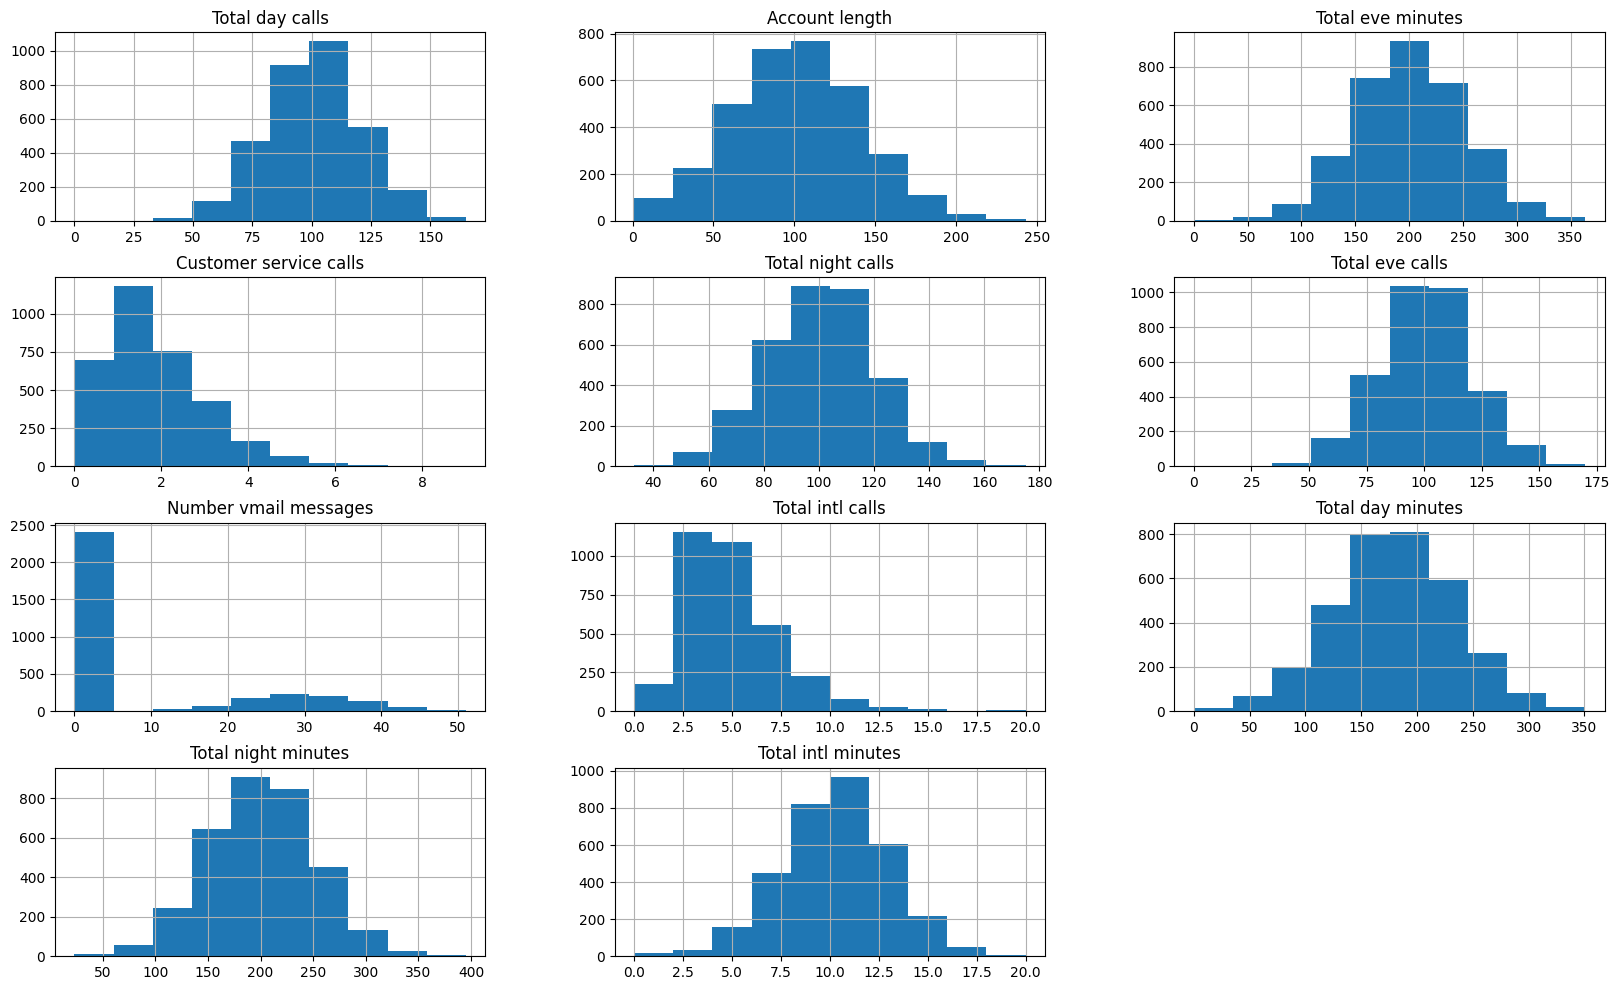

In [29]:
features = list(set(data.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn','Intensive_service_calls_Q','Phone number']))
data[features].hist(figsize=(20,12));

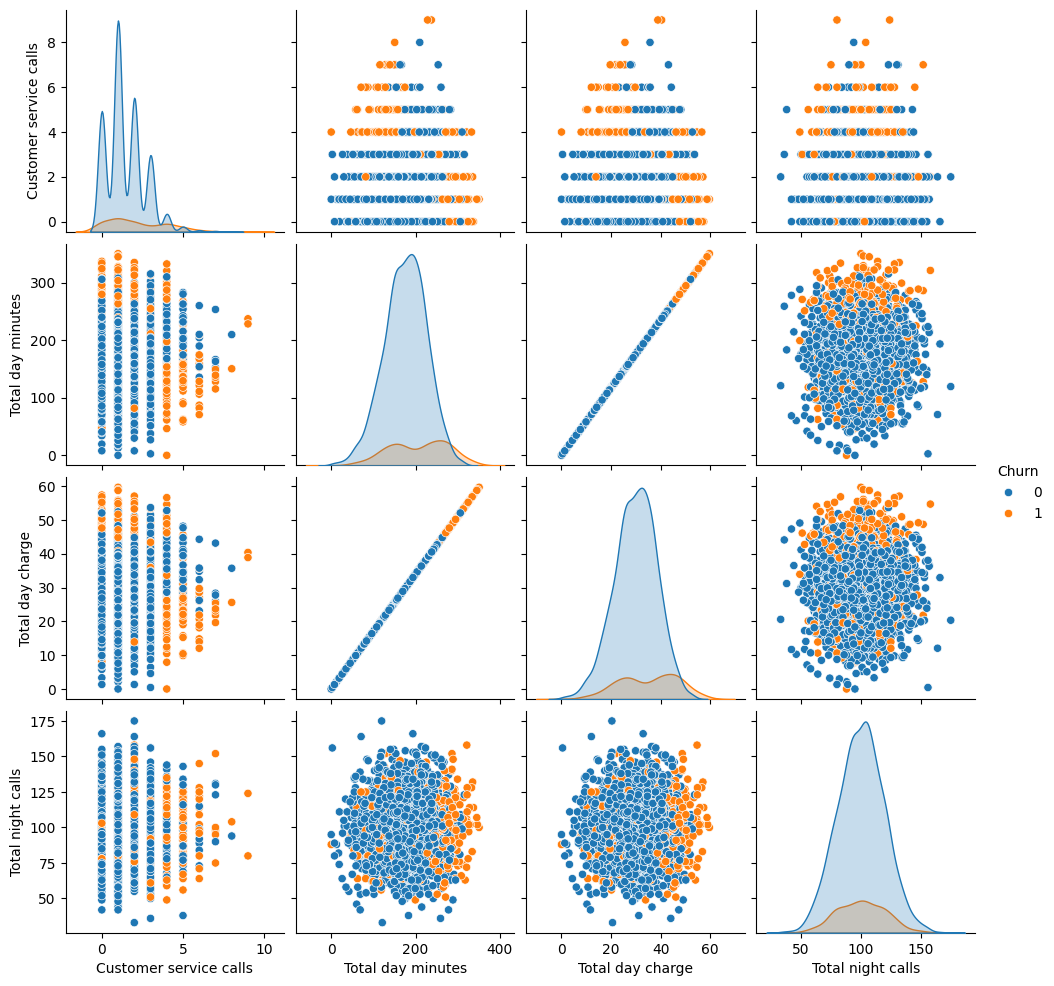

In [30]:
sns.pairplot(data[['Customer service calls','Total day minutes','Total day charge','Total night calls','Churn',]], hue='Churn');

### <font color = 'green'> Example 4. Graphical data analysis. Using the example of Fischer's Irises</font>

In [31]:
iris = sns.load_dataset('iris')


In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


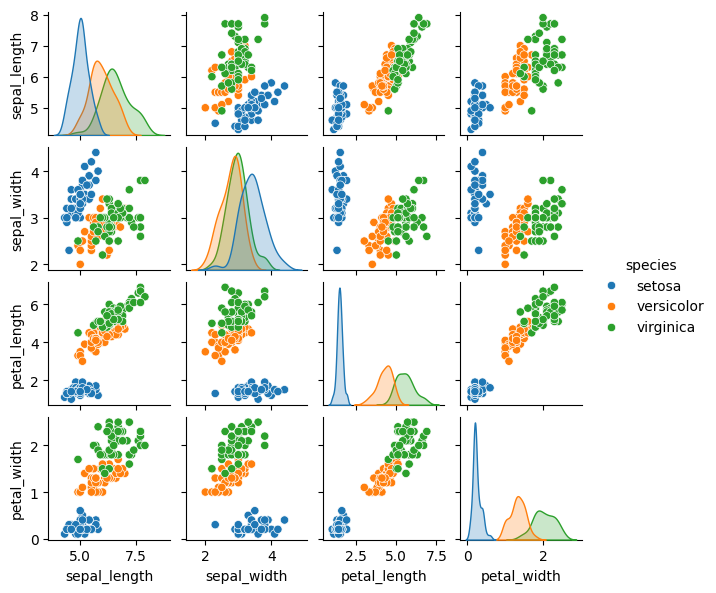

In [33]:
sns.pairplot(iris, hue='species',height=1.5);
plt.show();

In [34]:
features = list(set(iris.columns)-set(['species']))

In [35]:
features

['sepal_length', 'petal_width', 'petal_length', 'sepal_width']

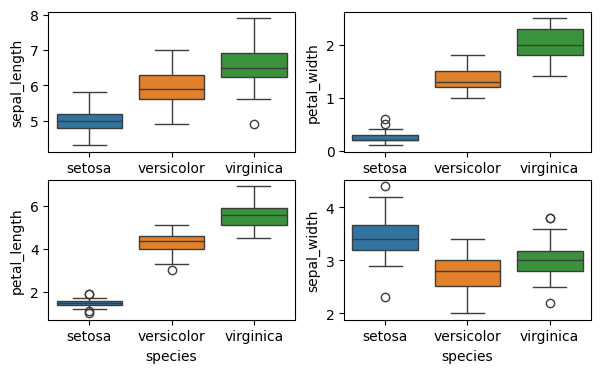

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))

for idx, feat in  enumerate(features):
    sns.boxplot(x='species', y = feat, data = iris, ax=axes[idx // 2, idx % 2],hue='species')
    axes[idx // 2, idx % 2].set_xlabel('species')
    axes[idx // 2, idx % 2].set_ylabel(feat);
plt.show();

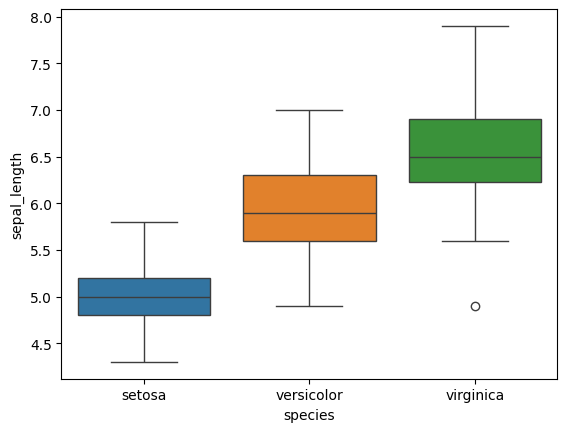

In [37]:
sns.boxplot(x='species', y = 'sepal_length', data = iris,hue='species');
plt.show();

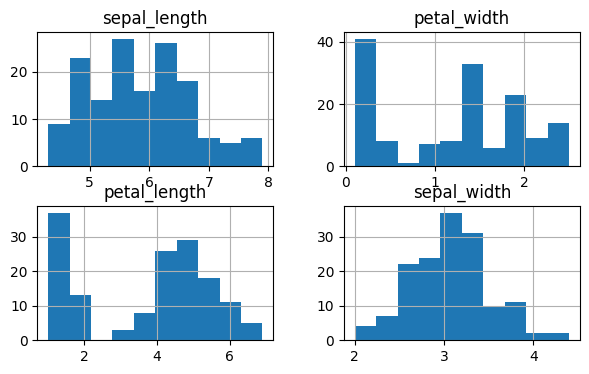

In [38]:
iris[features].hist(figsize=(7,4));
plt.show();

 https://habr.com/ru/articles/248623/

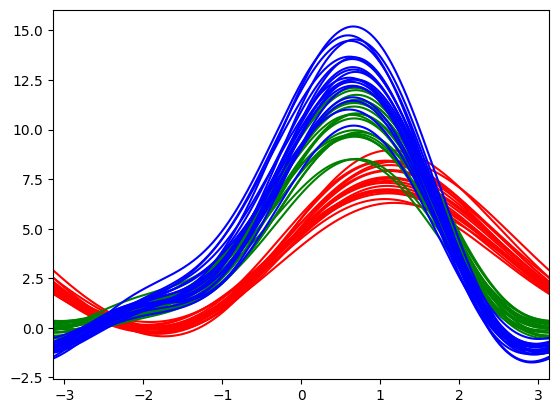

In [39]:
def andrews_curve(x,theta):
  curve = list()
  for th in theta:
    x1 = x[0] / np.sqrt(2)
    x2 = x[1] * np.sin(th)
    x3 = x[2] * np.cos(th)
    x4 = x[3] * np.sin(2.*th)
    curve.append(x1+x2+x3+x4)
  return curve

accuracy = 1000
samples = iris.drop(['species'],axis=1).values
theta = np.linspace(-np.pi, np.pi, accuracy)

for s in samples[:20]: # setosa
  plt.plot(theta, andrews_curve(s, theta), 'r')

for s in samples[50:70]: # versicolor
  plt.plot(theta, andrews_curve(s ,theta), 'g')

for s in samples[100:120]: # virginica
  plt.plot(theta, andrews_curve(s, theta), 'b')

plt.xlim(-np.pi,np.pi)
plt.show()


<font color = 'red' size = 5>Task 1 </font>

1. Study examples of point work with features in the source data.

2. After working with the documentation and examples, select and prepare features for the famous [titanik dataset](https://www.kaggle.com/c/titanic/data) , as well as for the [operators](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets) data
+ 2.1 Visualize the features. Determine their types.
+ 2.2 Remove anomalous data where necessary (using the simplest z-score and IQR methods).
+ 2.3 Identify important features using descriptive statistics and correlation.
+ 2.4 Fill in the blanks and work with the data at your own discretion.
+ 2.5 Save the prepared dataset to a new csv file.
   
        



[https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)


### <font color = 'green'> Example 5. Working with text </font>

####  bag of words

In [40]:
from functools import reduce
import numpy as np

texts = [['i', 'love', 'my', 'mmf'],
         ['he', 'hate', 'my', 'mmf'],
         ['he', 'and', 'i', 'hate', 'and', 'love', 'my','mmf']]

dictionary = list(enumerate(set(list(reduce(lambda x, y: x + y, texts)))))

def vectorize(text):
    vector = np.zeros(len(dictionary))
    for i, word in dictionary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector

for t in texts:
    print(vectorize(t))

[1. 0. 1. 0. 1. 0. 1.]
[0. 1. 1. 0. 0. 1. 1.]
[1. 1. 1. 2. 1. 1. 1.]


In [41]:
dictionary

[(0, 'love'),
 (1, 'he'),
 (2, 'my'),
 (3, 'and'),
 (4, 'i'),
 (5, 'hate'),
 (6, 'mmf')]

#### Bag of words с N-grams

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit_transform(["no i have questions", "i have no questions"]).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [43]:
vect.vocabulary_

{'no': 1, 'have': 0, 'questions': 2}

In [44]:
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit_transform(["no i have questions", "i have no questions"]).toarray()

array([[1, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1]], dtype=int64)

In [45]:
vect.vocabulary_

{'no': 3,
 'have': 0,
 'questions': 6,
 'no have': 4,
 'have questions': 2,
 'have no': 1,
 'no questions': 5}

#### TF- IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [47]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

In [48]:
print('Document transform',X.toarray())

Document transform [[0.         0.27824521 0.4711101  0.4711101  0.         0.
  0.         0.4711101  0.         0.         0.35829137 0.35829137
  0.        ]
 [0.40619178 0.31544415 0.         0.         0.53409337 0.53409337
  0.         0.         0.         0.         0.         0.40619178
  0.        ]
 [0.32412354 0.25171084 0.         0.         0.         0.
  0.4261835  0.         0.4261835  0.4261835  0.32412354 0.
  0.4261835 ]]


In [49]:
X.toarray()[0]

array([0.        , 0.27824521, 0.4711101 , 0.4711101 , 0.        ,
       0.        , 0.        , 0.4711101 , 0.        , 0.        ,
       0.35829137, 0.35829137, 0.        ])

In [50]:
print(vectorizer.vocabulary_)

{'it': 3, 'is': 2, 'going': 1, 'to': 10, 'rain': 7, 'today': 11, 'am': 0, 'not': 4, 'outside': 5, 'watch': 12, 'the': 9, 'season': 8, 'premiere': 6}


<font color = 'red' size = 5>Task 2 </font>

1. Study the example of working with a text dataset described above.

2. Prepare a text dataset of movie reviews for further work. [Imdb - rews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) .
+ 2.1 Using the built-in capabilities of *TfidfVectorizer*.
+ 2.2 By implementing an analogue yourself.
+ 2.3 Save the prepared dataset to a new csv file.

[https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)

## <font color = 'green'> 2. Introduction to classification.</font>

[[ 8.54571467 -8.59032319]]


array([0.610399])

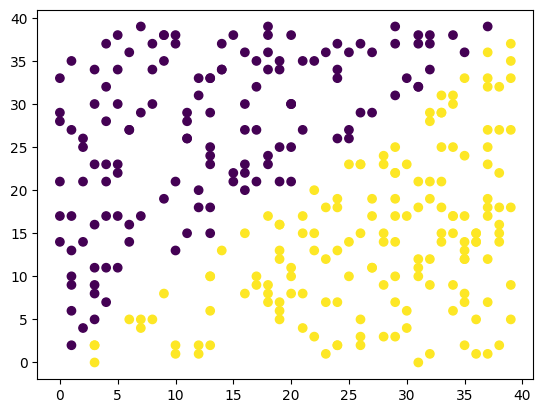

In [51]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
(inner_preds == y_data).mean()

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

<font color = 'red' size = 5>Task 3 </font>

Using built-in *python* capabilities, implement a simple classifier model for the data from Sec. 1 and Sec. 2. Draw conclusions about the accuracy using the *accurancy_score* metric.
